In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [2]:
ls crime_data_raw/2016

apr16.xls*  dec16.xls*  jan16.xls*  jun16.xls*  may16.xls*  oct16.xls*
aug16.xls*  feb16.xls*  jul16.xls*  mar16.xls*  nov16.xls*  sep16.xls*


In [3]:
path = 'crime_data_raw/2016'

In [4]:
#ls crime_data_raw/

In [ ]:
# # get premise codes

# pc = pd.read_csv('crime_data_raw/premise_codes.csv')
# pc.head()

In [ ]:
# # rename premise column for easy merge
# pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
# pc.info()

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date            122693 non-null datetime64[ns]
Hour            122693 non-null int64
Offense Type    122693 non-null object
Beat            122693 non-null object
Premise         121293 non-null object
BlockRange      122693 non-null object
StreetName      122693 non-null object
Type            122693 non-null object
Suffix          122693 non-null object
# offenses      122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


In [8]:
df[df.Date.isnull()]

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses


## Inspect Premise col

In [9]:
len(df.Premise.value_counts(dropna=False))

126

In [10]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     17013
Apartment Parking Lot                  13931
Road, Street, or Sidewalk              12857
Apartment                              11923
Restaurant or Cafeteria Parking Lot     5034
Name: Premise, dtype: int64

In [11]:
df.Premise.unique()

array(['Road, Street, or Sidewalk', 'Apartment', 'Driveway',
       'Service or Gas Station', 'Apartment Parking Lot',
       'Residence or House', 'Other Parking Lot',
       'Multi-Plex Home (Duplex,Triplex Etc.)', 'Sexually Oriented Club',
       'Church, Synagogue, or Temple',
       'Miscellaneous Business (Non-Specific)',
       'Department or Discount Store', 'Commercial Parking Lot or Garage',
       'Fire Station', 'Body Shop', 'Garage or Carport', 'Bus Stop',
       'Vacant Hotel, Motel, Etc.', 'Grocery Store or Supermarket',
       'Bar or Night Club', 'Other, Unknown, or Not Listed',
       'Bar or Night Club Parking Lot',
       'Vacant Other Residential (Apartment,Dorms)',
       'Vacant Storage Fac (Barn,Garage,Warehouse)', 'Hospital',
       'Convenience Store', 'Restaurant or Cafeteria Parking Lot',
       'Grocery Store or Supermarket Parking Lot',
       'Light Rail (Metro Rail) Vehicle',
       'Stadium, Sports Arena, Race Track',
       'Vacant Building (Commercial

In [12]:
df.Premise = df.Premise.str.strip()

In [13]:
len(df.Premise.value_counts(dropna=False))

126

In [14]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     17013
Apartment Parking Lot                  13931
Road, Street, or Sidewalk              12857
Apartment                              11923
Restaurant or Cafeteria Parking Lot     5034
Name: Premise, dtype: int64

In [15]:
# check if  null values
df.isnull().values.any().any()

True

In [16]:
# check su, of null values
df.isnull().values.sum()

1400

In [17]:
len(df[df.isnull().any(axis=1)])

1400

## Visualize our data

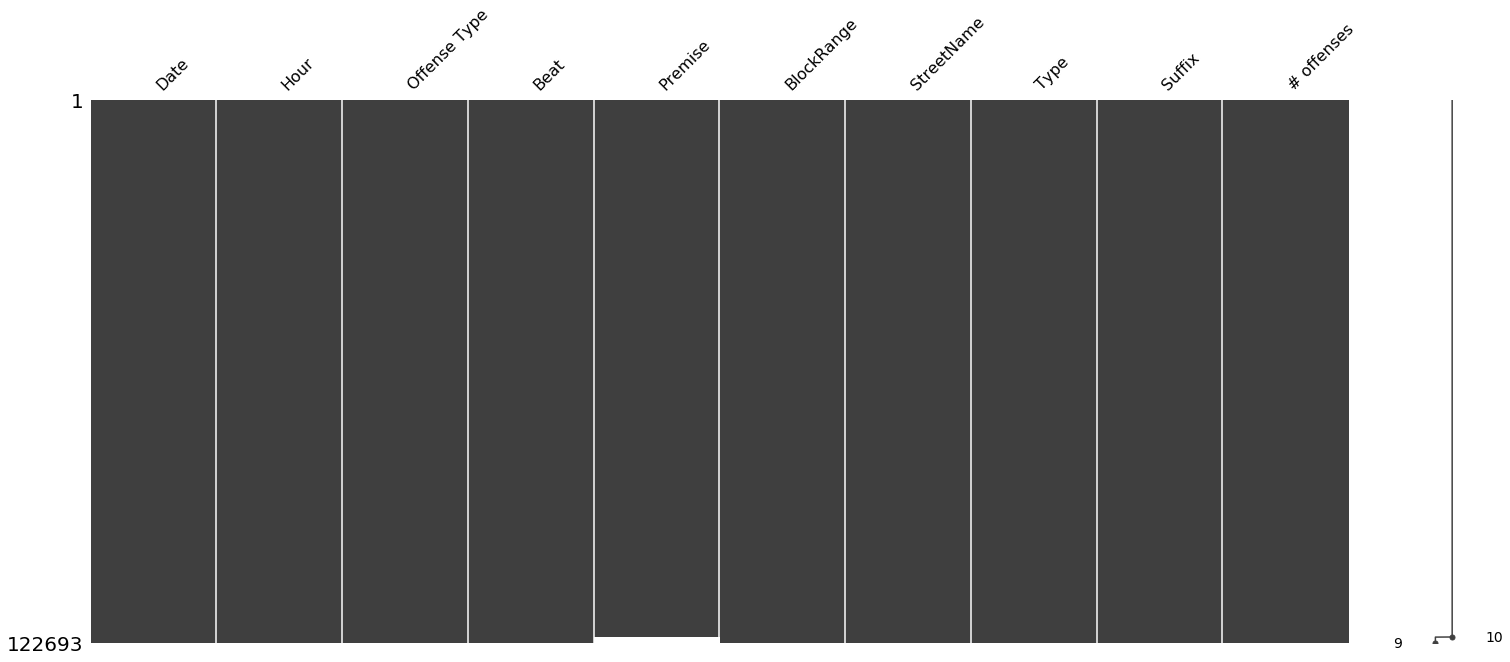

In [18]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [19]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [ ]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [ ]:
df.head()

In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [20]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date           122693 non-null datetime64[ns]
Hour           122693 non-null int64
OffenseType    122693 non-null object
Beat           122693 non-null object
Premise        121293 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
Type           122693 non-null object
Suffix         122693 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


## Subset dataframe to work on 

In [21]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 8 columns):
Date           122693 non-null datetime64[ns]
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
Hour           122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.5+ MB


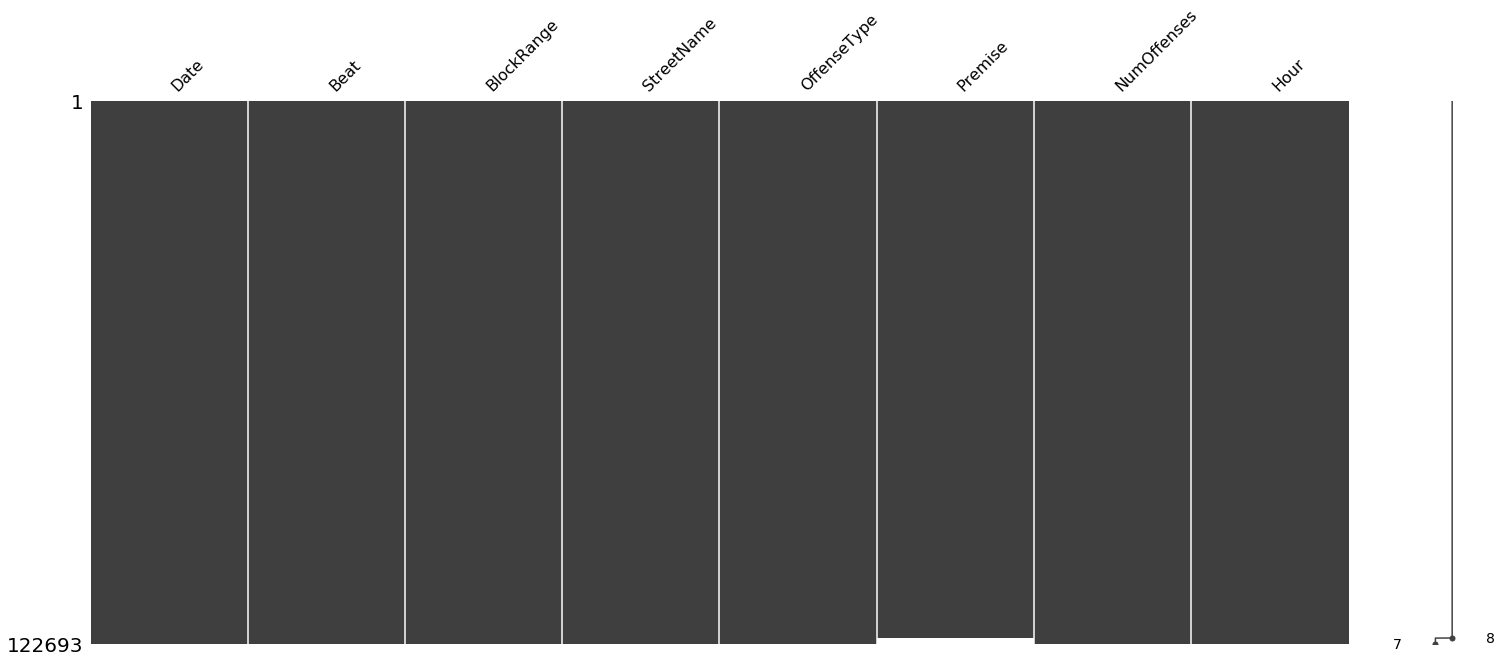

In [22]:

sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [23]:
len(crimes[crimes.Date.isnull()])

0

In [24]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [25]:
len(crimes[crimes.Beat.isnull()])

0

In [26]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [27]:
len(crimes[crimes.BlockRange.isnull()])

0

In [28]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [29]:
len(crimes[crimes.StreetName.isnull()])

0

In [30]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [31]:
len(crimes[crimes.OffenseType.isnull()])

0

In [32]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [33]:
len(crimes[crimes.Premise.isnull()])

1400

In [34]:
crimes[crimes.Premise.isnull()].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
176,2016-04-23,10H40,1000-1099,ELGIN,Theft,NaN,1,19
309,2016-04-02,10H60,5900-5999,SCOTT,Theft,NaN,1,9
326,2016-04-27,10H60,2300-2399,WICHITA,Burglary,NaN,1,5
485,2016-04-10,10H80,1100-1199,AUTREY,Theft,NaN,1,10
670,2016-04-26,11H10,7400-7499,SATSUMA,Aggravated Assault,NaN,1,15


In [35]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [36]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [37]:
len(crimes[crimes.Hour.isnull()])

0

In [38]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Find NaN
- drop if > 2 nan

In [39]:
len(crimes[crimes.isnull().any(axis=1)])

1400

In [40]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
176,2016-04-23,10H40,1000-1099,ELGIN,Theft,NaN,1,19
309,2016-04-02,10H60,5900-5999,SCOTT,Theft,NaN,1,9
326,2016-04-27,10H60,2300-2399,WICHITA,Burglary,NaN,1,5
485,2016-04-10,10H80,1100-1199,AUTREY,Theft,NaN,1,10
670,2016-04-26,11H10,7400-7499,SATSUMA,Aggravated Assault,NaN,1,15


In [ ]:
#crimes = crimes.dropna(thresh=2)

In [ ]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [ ]:
# # join two datarames
# crimes = pd.merge(crimes, pc, on='Premise', how='outer')
# crimes.info()

In [ ]:
#crimes.head()

In [ ]:
#len(crimes[crimes['Premise Description'].isnull()])

In [ ]:
#crimes[crimes['Premise Description'].isnull()].head()

## Problem
- find nan values on one col, and copy related col

In [ ]:
#crimes.Premise.unique()

In [ ]:
#len(crimes[crimes['Premise'] == '---'])

In [ ]:
#len(crimes[crimes['Premise'] == 'N'])

In [ ]:
#crimes[crimes['Premise'] == 'N']

In [ ]:
#crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [ ]:
#len(crimes[crimes['Premise Description'].isnull()])

In [ ]:

#crimes[crimes['Premise Description'].isnull()]

## Visualize data

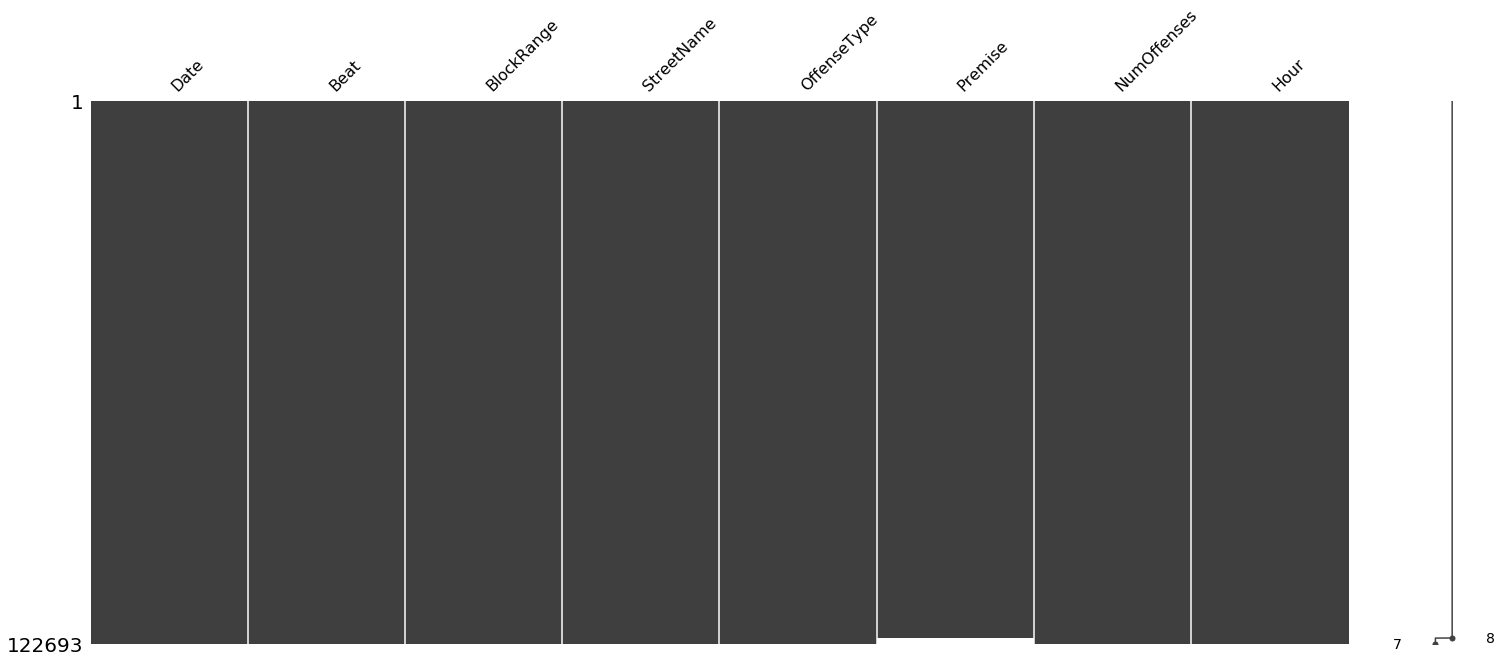

In [41]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [42]:
len(crimes[crimes.isnull().any(axis=1)])

1400

In [43]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
121999,2016-09-13,7C50,15700-15799,JOHN F KENNEDY,Theft,NaN,2,0
122013,2016-09-14,7C50,15200-15299,JOHN F KENNEDY,Theft,NaN,1,0
122184,2016-09-15,8C30,9100-9199,WAYSIDE,Theft,NaN,1,23
122218,2016-09-01,8C40,9000-9099,SPIKEWOOD,Theft,NaN,1,7
122472,2016-09-05,9C30,9700-9799,WALLISVILLE,Theft,NaN,1,10


## drop rows with 2 or 3 or more NaN

In [44]:
crimes = crimes.dropna(thresh=3)

In [45]:
len(crimes[crimes.isnull().any(axis=1)])

1400

In [46]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
121999,2016-09-13,7C50,15700-15799,JOHN F KENNEDY,Theft,NaN,2,0
122013,2016-09-14,7C50,15200-15299,JOHN F KENNEDY,Theft,NaN,1,0
122184,2016-09-15,8C30,9100-9199,WAYSIDE,Theft,NaN,1,23
122218,2016-09-01,8C40,9000-9099,SPIKEWOOD,Theft,NaN,1,7
122472,2016-09-05,9C30,9700-9799,WALLISVILLE,Theft,NaN,1,10


## Inspect each column

In [47]:
crimes.dtypes

Date           datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses             int64
Hour                    int64
dtype: object

## Beat

In [48]:
len(crimes.Beat.value_counts())

120

In [49]:
len(crimes.Beat.value_counts(dropna=False))

120

In [50]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I40', '21I50', '21I60', '23J50',
       '24C10', '24C20', '24C30', '24C40', '24C50', '24C60', '2A10',
       '2A20', '2A30', '2A40', '2A50', '2A60', '3B10', '3B30', '3B40',
       '3B50', '4F10', '4F20', '4F30', '5F10', '5F20', '5F30', '5F40',
       '6B10', '6B20', '6B30', '6B40', '6B50', '6B60', '7C10', '7C20',
       '7C30',

In [51]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [52]:
len(crimes.Beat.value_counts(dropna=False))

120

In [53]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [54]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [55]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I40', '21I50', '21I60', '23J50',
       '24C10', '24C20', '24C30', '24C40', '24C50', '24C60', '2A10',
       '2A20', '2A30', '2A40', '2A50', '2A60', '3B10', '3B30', '3B40',
       '3B50', '4F10', '4F20', '4F30', '5F10', '5F20', '5F30', '5F40',
       '6B10', '6B20', '6B30', '6B40', '6B50', '6B60', '7C10', '7C20',
       '7C30',

In [56]:
crimes.Beat.value_counts(dropna=False).head()

1A20     3049
12D10    2576
19G10    2386
1A30     2273
2A50     2259
Name: Beat, dtype: int64

## BlockRange

In [57]:
len(crimes.BlockRange.value_counts(dropna=False))

242

In [58]:
crimes.BlockRange.value_counts(dropna=False).head()

2300-2399    1752
100-199      1707
900-999      1582
2400-2499    1529
1000-1099    1484
Name: BlockRange, dtype: int64

In [59]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [60]:
len(crimes.BlockRange.value_counts(dropna=False))

242

## StreetName

In [61]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7844


In [62]:
crimes.StreetName = crimes.StreetName.str.strip()

In [63]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7844


In [64]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER     3768
SAM HOUSTON    1792
GULF           1785
KATY           1696
GESSNER        1680
Name: StreetName, dtype: int64


## OffenseType

In [65]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:8


In [66]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [67]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:8


In [68]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 69219
Burglary              18442
Auto Theft            12690
Aggravated Assault    10866
Robbery                9955
Rape                   1232
Murder                  285
NaN                       4
Name: OffenseType, dtype: int64


## Premise

In [69]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:126


In [70]:
crimes.Premise = crimes.Premise.str.strip()

In [71]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:126


In [72]:
crimes.Premise.value_counts(dropna=False).head()

Residence or House                     17013
Apartment Parking Lot                  13931
Road, Street, or Sidewalk              12857
Apartment                              11923
Restaurant or Cafeteria Parking Lot     5034
Name: Premise, dtype: int64

## Premise Description

In [73]:
#print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

In [74]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
#crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [75]:
#print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

In [76]:
#print(crimes['Premise Description'].value_counts(dropna=False).head())

# Set Date as index

In [77]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [78]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
Date,,,,,,,
1916-05-23,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,19
1916-08-06,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,9
1916-10-22,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,9
1916-10-22,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,15
1916-10-22,20G30,2900-2999,HAYES,Theft,Apartment,1,13


## Create Columns with day,weekday,month,year from date index

In [79]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [80]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1916-05-23,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,19,23,Tuesday,May,1916
1916-08-06,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,9,06,Sunday,Aug,1916
1916-10-22,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,9,22,Sunday,Oct,1916
1916-10-22,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,15,22,Sunday,Oct,1916
1916-10-22,20G30,2900-2999,HAYES,Theft,Apartment,1,13,22,Sunday,Oct,1916


## null values

- check
- count
- display

In [81]:
crimes.isnull().values.any().any()

True

In [82]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

1442

In [83]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1991-09-21,11H10,7000-7099,CAPITOL,Rape,NaN,1,20,21,Saturday,Sep,1991
2002-02-23,2A60,3000-3099,11TH,Rape,NaN,1,8,23,Saturday,Feb,2002
2002-11-04,19G50,11700-11799,SOUTHWEST,Theft,NaN,1,13,04,Monday,Nov,2002
2005-09-20,14D20,5000-5099,SUNFLOWER,Rape,NaN,1,22,20,Tuesday,Sep,2005
2006-04-08,17E20,9100-9199,FONDREN,Rape,NaN,1,19,08,Saturday,Apr,2006


In [84]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122693 entries, 1916-05-23 to 2016-12-31
Data columns (total 11 columns):
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122655 non-null object
OffenseType    122689 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
Hour           122693 non-null int64
day            122693 non-null object
weekday        122693 non-null object
month          122693 non-null object
year           122693 non-null object
dtypes: int64(2), object(9)
memory usage: 13.7+ MB


## New Dataframe
- remove premise col
- keep premise description

In [85]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1916-05-23,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,19,23,Tuesday,May,1916
1916-08-06,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,9,06,Sunday,Aug,1916
1916-10-22,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,9,22,Sunday,Oct,1916
1916-10-22,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,15,22,Sunday,Oct,1916
1916-10-22,20G30,2900-2999,HAYES,Theft,Apartment,1,13,22,Sunday,Oct,1916


In [86]:
crime_yr.isnull().values.any().any()

True

In [87]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

1442

In [88]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2016-12-31,20G30,3100-3199,HAYES,Aggravated Assault,NaN,1,23,31,Saturday,Dec,2016
2016-12-31,3B40,800-899,CROSSTIMBERS,Robbery,NaN,1,11,31,Saturday,Dec,2016
2016-12-31,3B50,5200-5299,AIRLINE,Auto Theft,NaN,1,12,31,Saturday,Dec,2016
2016-12-31,12D10,8600-8699,AIRPORT,Theft,NaN,1,18,31,Saturday,Dec,2016
2016-12-31,9C40,13300-13399,MARKET,Aggravated Assault,NaN,1,23,31,Saturday,Dec,2016


# FIND NANS

## INDEX

In [89]:
len(crime_yr[crime_yr.index.isnull()])

0

In [90]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [91]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1916-05-23', '1916-08-06', '1916-10-22', '1916-10-22',
               '1916-10-22', '1918-11-18', '1919-09-28', '1920-09-03',
               '1921-09-06', '1926-06-16',
               ...
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=122693, freq=None)

In [92]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [93]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [94]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [95]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [96]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [97]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## BlockRAnge

In [98]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [99]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## StreetName

In [100]:
len(crime_yr[crime_yr.StreetName.isnull()])

38

In [101]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2016-02-12,3B40,UNK,NaN,Burglary,Residence or House,1,17,12,Friday,Feb,2016
2016-02-26,2A60,UNK,NaN,Burglary,Garage or Carport,1,8,26,Friday,Feb,2016
2016-02-29,3B40,UNK,NaN,Aggravated Assault,"Road, Street, or Sidewalk",1,18,29,Monday,Feb,2016
2016-03-01,3B40,UNK,NaN,Burglary,Residence or House,1,16,01,Tuesday,Mar,2016
2016-03-09,2A30,UNK,NaN,Theft,Construction Site,1,8,09,Wednesday,Mar,2016


In [102]:
crime_yr.StreetName = crime_yr.StreetName.replace(np.nan, 'UNK')

In [103]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

## OffenseType

In [104]:
len(crime_yr[crime_yr.OffenseType.isnull()])

4

In [105]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2015-06-04,11H10,5600-5699,LEELAND,NaN,Apartment,1,20,04,Thursday,Jun,2015
2015-11-17,8C50,8600-8699,STERLINGSHIRE,NaN,Apartment,1,0,17,Tuesday,Nov,2015
2016-07-02,5F40,11600-11699,GESSNER,NaN,Residence or House,1,14,02,Saturday,Jul,2016
2016-07-15,12D20,11200-11299,SAGELAND,NaN,Residence or House,1,0,15,Friday,Jul,2016


In [106]:
crime_yr.OffenseType = crime_yr.OffenseType.replace(np.nan, 'UNK')

In [107]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

## Hour

In [108]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [109]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie 

In [110]:
len(crime_yr[crime_yr['Premise'].isnull()])

1400

In [111]:
crime_yr[crime_yr['Premise'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1991-09-21,11H10,7000-7099,CAPITOL,Rape,NaN,1,20,21,Saturday,Sep,1991
2002-02-23,2A60,3000-3099,11TH,Rape,NaN,1,8,23,Saturday,Feb,2002
2002-11-04,19G50,11700-11799,SOUTHWEST,Theft,NaN,1,13,04,Monday,Nov,2002
2005-09-20,14D20,5000-5099,SUNFLOWER,Rape,NaN,1,22,20,Tuesday,Sep,2005
2006-04-08,17E20,9100-9199,FONDREN,Rape,NaN,1,19,08,Saturday,Apr,2006


In [112]:
crime_yr['Premise'] = crime_yr['Premise'].replace(np.nan, 'No label')

In [113]:
len(crime_yr[crime_yr['Premise'].isnull()])

0

In [114]:
crime_yr[crime_yr['Premise'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [115]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [116]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [ ]:
# # change column name from Premise Descriptionto Premise

# crime_yr.rename(columns={
#     'Premise Description': 'Premise',}, inplace=True)
# crime_yr.info()

In [117]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1916-05-23,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,19,23,Tuesday,May,1916
1916-08-06,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,9,06,Sunday,Aug,1916
1916-10-22,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,9,22,Sunday,Oct,1916
1916-10-22,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,15,22,Sunday,Oct,1916
1916-10-22,20G30,2900-2999,HAYES,Theft,Apartment,1,13,22,Sunday,Oct,1916


In [118]:
ls crime_data_clean/new

crime10_clean.csv*  crime15_clean.csv*        Final_crime12_clean.csv*
crime11_clean.csv*  crime16_clean.csv*        Final_crime13_clean.csv*
crime12_clean.csv*  crime17_clean.csv*        Final_crime14_clean.csv*
crime13_clean.csv*  Final_crime10_clean.csv*  Final_crime15_clean.csv*
crime14_clean.csv*  Final_crime11_clean.csv*


In [119]:
crime_yr.to_csv('crime_data_clean/new/Final_crime16_clean.csv')

In [120]:
ls crime_data_clean/new

crime10_clean.csv*  crime15_clean.csv*        Final_crime12_clean.csv*
crime11_clean.csv*  crime16_clean.csv*        Final_crime13_clean.csv*
crime12_clean.csv*  crime17_clean.csv*        Final_crime14_clean.csv*
crime13_clean.csv*  Final_crime10_clean.csv*  Final_crime15_clean.csv*
crime14_clean.csv*  Final_crime11_clean.csv*  Final_crime16_clean.csv*
